In [5]:
import matplotlib.pyplot as plt
from matplotlib.pylab import figure, subplot2grid
import numpy as np
import pandas as pd

dt = pd.read_csv('data.csv', sep = ';')


In [6]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

winter_r = cm.get_cmap('PiYG', 256)
newcolors = winter_r(np.linspace(0, 1, 256))
newcolors[-150:, :] = cm.get_cmap('RdGy_r', 150)(np.linspace(0.55, 1, 150))
newcmp = ListedColormap(newcolors)

C:\Users\79069\AppData\Local\Temp\ipykernel_308\3919186409.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  winter_r = cm.get_cmap('PiYG', 256)
C:\Users\79069\AppData\Local\Temp\ipykernel_308\3919186409.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  newcolors[-150:, :] = cm.get_cmap('RdGy_r', 150)(np.linspace(0.55, 1, 150))


In [7]:
x0 = []
y0 = []
v = []

x1 = []
y1 = []

x2 = []
y2 = []

x3 = []
y3 = []

i = 0
for l in dt.label:
    if l == 0:
        x0.append(dt.x1[i])
        y0.append(dt.x2[i])
        v.append(dt.value[i])
    elif l == 1:
        x1.append(dt.x1[i])
        y1.append(dt.x2[i])
    elif l == 2:
        x2.append(dt.x1[i])
        y2.append(dt.x2[i])
    elif l == 3:
        x3.append(dt.x1[i])
        y3.append(dt.x2[i])
    i += 1

max_v = min(v)
max_index = v.index(max_v)

zoom_x_1 = dt.x1[max_index] - 0.1, dt.x1[max_index] + 0.1
zoom_y_1 = dt.x2[max_index] - 0.1 * 1200, dt.x2[max_index] + 0.1 * 1200
print(zoom_y_1)

zoom_x_2 = dt.x1[max_index] - 0.025, dt.x1[max_index] + 0.025
zoom_y_2 = dt.x2[max_index] - 0.025 * 1200, dt.x2[max_index] + 0.025 * 1200
print(zoom_y_2)

(np.float64(628.80438083648), np.float64(868.80438083648))
(np.float64(718.80438083648), np.float64(778.80438083648))


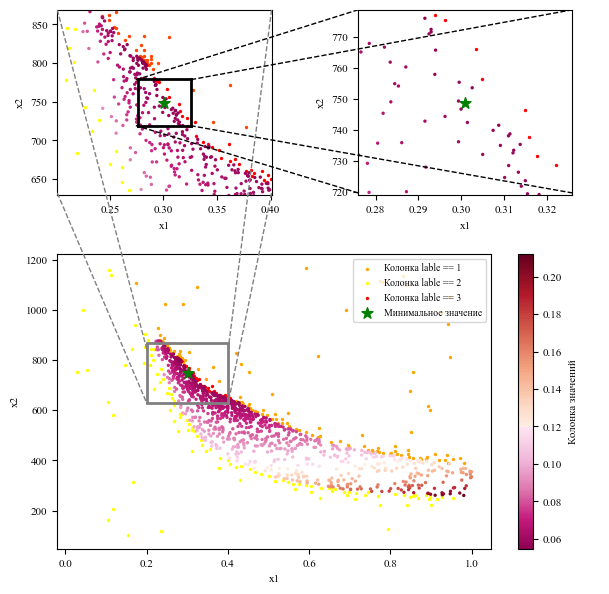

In [8]:
size = 2

f0 = figure(num = 0, figsize = (7, 7))

plt.rcParams.update({'font.size': 8})

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]



ax03 = subplot2grid((20, 2), (9, 0), colspan=19, rowspan=11)

plt.xlabel('x1', fontsize=8)
plt.ylabel('x2', fontsize=8)

plt.scatter(x1, y1, s = size, color = 'orange', label = 'Колонка lable == 1')
plt.scatter(x2, y2, s = size, color = 'yellow', label = 'Колонка lable == 2')
plt.scatter(x3, y3,  s = size, color = 'red', label = 'Колонка lable == 3')
cc = plt.scatter(x0, y0, s = size, c=v, cmap = newcmp)
plt.colorbar(cc).set_label('Колонка значений')
plt.scatter(dt.x1[max_index], dt.x2[max_index], s = 70, color='green', marker='*', label = 'Минимальное значение')

plt.axhline(zoom_y_1[0], zoom_x_1[0]/0.97, zoom_x_1[1]/1.02, color='gray', linewidth=2)
plt.axhline(zoom_y_1[1], zoom_x_1[0]/0.97, zoom_x_1[1]/1.02, color='gray', linewidth=2)
plt.axvline(zoom_x_1[0], zoom_y_1[0]/1250, zoom_y_1[1]/1250, color='gray', linewidth=2)
plt.axvline(zoom_x_1[1], zoom_y_1[0]/1250, zoom_y_1[1]/1250, color='gray', linewidth=2)

plt.legend(loc = 'upper right', fontsize=7)

ax01 = subplot2grid((20, 20), (0, 0), colspan=8, rowspan=7)
ax01.set_xlim(zoom_x_1)
ax01.set_ylim(zoom_y_1)

plt.xlabel('x1', fontsize=8)
plt.ylabel('x2', fontsize=8)

plt.scatter(x1, y1, s = size, color = 'orange''red')
plt.scatter(x2, y2, s = size, color = 'yellow', )
plt.scatter(x3, y3,  s = size, color = 'red')
cc = plt.scatter(x0, y0, s = size, c=v, cmap = newcmp)
plt.scatter(dt.x1[max_index], dt.x2[max_index], s = 70, color='green', marker='*')


plt.axhline(zoom_y_2[0], (zoom_x_2[0]-zoom_x_1[0])/(zoom_x_1[1] - zoom_x_1[0]), (zoom_x_2[1]-zoom_x_1[0])/(zoom_x_1[1] - zoom_x_1[0]), color='black', linewidth=2)
plt.axhline(zoom_y_2[1], (zoom_x_2[0]-zoom_x_1[0])/(zoom_x_1[1] - zoom_x_1[0]), (zoom_x_2[1]-zoom_x_1[0])/(zoom_x_1[1] - zoom_x_1[0]), color='black', linewidth=2)
plt.axvline(zoom_x_2[0], (zoom_y_2[0]-zoom_y_1[0])/(zoom_y_1[1] - zoom_y_1[0]), (zoom_y_2[1]-zoom_y_1[0])/(zoom_y_1[1] - zoom_y_1[0]), color='black', linewidth=2)
plt.axvline(zoom_x_2[1], (zoom_y_2[0]-zoom_y_1[0])/(zoom_y_1[1] - zoom_y_1[0]), (zoom_y_2[1]-zoom_y_1[0])/(zoom_y_1[1] - zoom_y_1[0]), color='black', linewidth=2)

ax02 = subplot2grid((20, 20), (0, 11), colspan=8, rowspan=7)
ax02.set_xlim(zoom_x_2)
ax02.set_ylim(zoom_y_2)

plt.xlabel('x1', fontsize=8)
plt.ylabel('x2', fontsize=8)

plt.scatter(x1, y1, s = size, color = 'orange''red')
plt.scatter(x2, y2, s = size, color = 'purple', )
plt.scatter(x3, y3,  s = size, color = 'red')
cc = plt.scatter(x0, y0, s = size, c=v, cmap = newcmp)
plt.scatter(dt.x1[max_index], dt.x2[max_index], s = 70, color='green', marker='*')

ax03 = subplot2grid((20, 20), (0, 0), colspan=20, rowspan=20)
ax03.set_xlim(0, 20)
ax03.set_ylim(0, 20)
plt.plot([0,3.3],[13.2,5.4],color='gray', linewidth=1, linestyle='--')
plt.plot([0,3.3],[20,7.4],color='gray', linewidth=1, linestyle='--')
plt.plot([7.9,6.3],[13.2,5.4],color='gray', linewidth=1, linestyle='--')
plt.plot([7.9,6.3],[20,7.4],color='gray', linewidth=1, linestyle='--')

plt.plot([11.1,2.9],[13.2,15.7],color='black', linewidth=1, linestyle='--')
plt.plot([11.1,2.9],[20,17.4],color='black', linewidth=1, linestyle='--')
plt.plot([19,4.9],[13.2,15.7],color='black', linewidth=1, linestyle='--')
plt.plot([19,4.9],[20,17.4],color='black', linewidth=1, linestyle='--')

plt.axis('off')  

plt.savefig('lab2.png', dpi=500, bbox_inches='tight')
plt.show()
